# Unpacking the Lyon Airbnb Ecosystem

## Dataset:

For this personal project on the analysis of Airbnb listings in Lyon, France, and applying *descriptive statistics*, I am using the following datasets:

- Lyon/listings.csv: Summary information and metrics for listings in Lyon. Data set from [Inside Airbnb](http://insideairbnb.com).

Data from September 10, 2023.

## Objectives:

- Explore the relationship between listing price and various attributes.
- Identify the most common property types and room types available in the city.
- Summarize any interesting findings or trends in the data.

## Questions:

The success of Airbnb hosts in Lyon (as in any city) depends on various factors. Understanding the key attributes that influence listing prices is vital for both hosts and potential guests. In this analysis, I want to uncover the relationship between listing prices and some of attributes, ranging from property characteristics to location. This analysis is an exploration of the Airbnb ecosystem in Lyon, shedding light on how some factors interplay in shaping the city's Airbnb landscape.

Wit this in mind, I want to answer just one question:

- What factors influence Airbnb Listing prices in Lyon?

## Data Overview:

To get started with this, we should begin by loading and inspecting the data to understand its format and quality. We'll use Python and libraries such as pandas for data manipulation and exploration.

In [43]:
import pandas as pd # Provides data structures and operations for manipulating numeric arrays.
import matplotlib.pyplot as plt # It provides an implicit, MATLAB-like, way of plotting.
import seaborn as sns # Python data visualization library based on matplotlib.

In [9]:
# Reading .csv file and saving it as a DataFrame call data.
data = pd.read_csv('listingsLyon.csv')

In [16]:
# Let's check the first few rows of the dataset to get a sense of its structure:
print(data.head()) # To read in vertical.

        id                           listing_url       scrape_id last_scraped  \
0    56766    https://www.airbnb.com/rooms/56766  20230910060002   2023-09-10   
1    77104    https://www.airbnb.com/rooms/77104  20230910060002   2023-09-10   
2   134539   https://www.airbnb.com/rooms/134539  20230910060002   2023-09-10   
3  1880785  https://www.airbnb.com/rooms/1880785  20230910060002   2023-09-10   
4   136556   https://www.airbnb.com/rooms/136556  20230910060002   2023-09-10   

            source                                               name  \
0      city scrape  Rental unit in Lyon · ★4.69 · 3 bedrooms · 4 b...   
1      city scrape  Rental unit in Lyon · ★4.80 · 1 bedroom · 1 be...   
2      city scrape  Rental unit in Lyon · ★4.48 · 1 bedroom · 1 be...   
3  previous scrape  Rental unit in Lyon · ★4.60 · 1 bedroom · 2 be...   
4      city scrape  Rental unit in Lyon · 1 bedroom · 3 beds · 1 bath   

                                         description  \
0  Beautifull dupl

In [17]:
data.head() # To read in horizontal.

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56766,https://www.airbnb.com/rooms/56766,20230910060002,2023-09-10,city scrape,Rental unit in Lyon · ★4.69 · 3 bedrooms · 4 b...,Beautifull duplex terrace on Lyon's roofs ! Co...,NaN,https://a0.muscache.com/pictures/26675020/4940...,269557,...,4.88,4.86,4.59,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,0.35
1,77104,https://www.airbnb.com/rooms/77104,20230910060002,2023-09-10,city scrape,Rental unit in Lyon · ★4.80 · 1 bedroom · 1 be...,"<b>The space</b><br />En plein coeur de Lyon, ...",NaN,https://a0.muscache.com/pictures/518769/186679...,411285,...,5.00,4.86,4.90,6938113058353,f,1,1,0,0,0.14
2,134539,https://www.airbnb.com/rooms/134539,20230910060002,2023-09-10,city scrape,Rental unit in Lyon · ★4.48 · 1 bedroom · 1 be...,Ideal situation and cosy..In the center of the...,Il est plus que charment !<br />C'est le plus ...,https://a0.muscache.com/pictures/1182887/f26f4...,660135,...,4.64,4.86,4.44,6938513221658,f,1,1,0,0,0.88
3,1880785,https://www.airbnb.com/rooms/1880785,20230910060002,2023-09-10,previous scrape,Rental unit in Lyon · ★4.60 · 1 bedroom · 2 be...,"Appartement de charme, de type canut, pierres ...",Quartier populaire et vivant avec bar et toute...,https://a0.muscache.com/pictures/ef64500e-1fad...,9791883,...,4.80,4.47,4.63,NaN,f,1,1,0,0,0.22
4,136556,https://www.airbnb.com/rooms/136556,20230910060002,2023-09-10,city scrape,Rental unit in Lyon · 1 bedroom · 3 beds · 1 bath,A 70 sq.m apartment full of charm and characte...,NaN,https://a0.muscache.com/pictures/864663/35ba79...,668524,...,5.00,5.00,5.00,0693831600055,f,1,1,0,0,0.01


In [14]:
# Let's get now the basic information about the dataset, including data types, non-null counts, and memory usage:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9898 non-null   int64  
 1   listing_url                                   9898 non-null   object 
 2   scrape_id                                     9898 non-null   int64  
 3   last_scraped                                  9898 non-null   object 
 4   source                                        9898 non-null   object 
 5   name                                          9898 non-null   object 
 6   description                                   9803 non-null   object 
 7   neighborhood_overview                         5350 non-null   object 
 8   picture_url                                   9898 non-null   object 
 9   host_id                                       9898 non-null   i

In [15]:
data.shape # Dimensions

(9898, 75)

With the column names now, we continue to the checking of the quality of the data. I will check specific columns to gain insights into the data within them.

In [18]:
columnsInterest = [
    "host_name", "host_location", "host_response_time", "host_has_profile_pic",
    "host_identity_verified", "property_type", "room_type", "bathrooms", "bedrooms",
    "beds", "price", "has_availability", "number_of_reviews", "review_scores_rating",
    "license", "minimum_nights", "maximum_nights", "host_listings_count"
]

In [19]:
# Let's create a new DataFrame (df) with only this selected columns.
selectedData = data[columnsInterest]
selectedData.head()

,host_name,host_location,host_response_time,host_has_profile_pic,host_identity_verified,property_type,room_type,bathrooms,bedrooms,beds,price,has_availability,number_of_reviews,review_scores_rating,license,minimum_nights,maximum_nights,host_listings_count
0,Isabelle,"Lyon, France",within a few hours,t,t,Entire rental unit,Entire home/apt,NaN,3.0,4.0,$125.00,t,55,4.69,"Available with a mobility lease only (""bail mo...",60,720,1.0
1,Clementine,"Lyon, France",within a few hours,t,t,Entire rental unit,Entire home/apt,NaN,1.0,1.0,$120.00,t,22,4.80,6938113058353,2,15,1.0
2,Polali,"Lyon, France",within a day,t,t,Entire rental unit,Entire home/apt,NaN,1.0,1.0,$90.00,t,130,4.48,6938513221658,2,30,1.0
3,Blandine,"Lyon, France",NaN,t,t,Entire rental unit,Entire home/apt,NaN,1.0,2.0,$60.00,t,20,4.60,NaN,365,1125,1.0
4,Nathalie,"Lyon, France",within a day,t,t,Entire rental unit,Entire home/apt,NaN,1.0,3.0,$99.00,t,2,5.00,0693831600055,3,730,1.0


In [20]:
selectedData = selectedData.drop('host_location', axis=1) # To operate on columns.
selectedData.head()

,host_name,host_response_time,host_has_profile_pic,host_identity_verified,property_type,room_type,bathrooms,bedrooms,beds,price,has_availability,number_of_reviews,review_scores_rating,license,minimum_nights,maximum_nights,host_listings_count
0,Isabelle,within a few hours,t,t,Entire rental unit,Entire home/apt,NaN,3.0,4.0,$125.00,t,55,4.69,"Available with a mobility lease only (""bail mo...",60,720,1.0
1,Clementine,within a few hours,t,t,Entire rental unit,Entire home/apt,NaN,1.0,1.0,$120.00,t,22,4.80,6938113058353,2,15,1.0
2,Polali,within a day,t,t,Entire rental unit,Entire home/apt,NaN,1.0,1.0,$90.00,t,130,4.48,6938513221658,2,30,1.0
3,Blandine,NaN,t,t,Entire rental unit,Entire home/apt,NaN,1.0,2.0,$60.00,t,20,4.60,NaN,365,1125,1.0
4,Nathalie,within a day,t,t,Entire rental unit,Entire home/apt,NaN,1.0,3.0,$99.00,t,2,5.00,0693831600055,3,730,1.0


## Data cleaning:

First, let's eliminate the $ in the price feature.

In [21]:
convertStr = lambda x:str(x)[1:].replace(',', '') if '$' in str(x) else x

selectedData['price'] = selectedData['price'].apply(convertStr)
selectedData['price'] = selectedData['price'].apply(lambda x: float(x))
selectedData.head()

,host_name,host_response_time,host_has_profile_pic,host_identity_verified,property_type,room_type,bathrooms,bedrooms,beds,price,has_availability,number_of_reviews,review_scores_rating,license,minimum_nights,maximum_nights,host_listings_count
0,Isabelle,within a few hours,t,t,Entire rental unit,Entire home/apt,NaN,3.0,4.0,125.0,t,55,4.69,"Available with a mobility lease only (""bail mo...",60,720,1.0
1,Clementine,within a few hours,t,t,Entire rental unit,Entire home/apt,NaN,1.0,1.0,120.0,t,22,4.80,6938113058353,2,15,1.0
2,Polali,within a day,t,t,Entire rental unit,Entire home/apt,NaN,1.0,1.0,90.0,t,130,4.48,6938513221658,2,30,1.0
3,Blandine,NaN,t,t,Entire rental unit,Entire home/apt,NaN,1.0,2.0,60.0,t,20,4.60,NaN,365,1125,1.0
4,Nathalie,within a day,t,t,Entire rental unit,Entire home/apt,NaN,1.0,3.0,99.0,t,2,5.00,0693831600055,3,730,1.0


I want to check now the unique values in the categorical variables and license.

In [28]:
numericalColumns = selectedData.select_dtypes(include=[int, float]).columns
categoricalColumns = selectedData.select_dtypes(include=[object]).columns

# Display unique values for categorical clumns:
for columns in categoricalColumns:
    uniqueValues = selectedData[columns].unique()
    print(f"Unique values in '{columns}':\n{uniqueValues}\n")

Unique values in 'host_name':
['Isabelle' 'Clementine' 'Polali' ... 'Edmond' 'Chantal & Philippe'
 'Mirabelle']

Unique values in 'host_response_time':
['within a few hours' 'within a day' nan 'within an hour'
 'a few days or more']

Unique values in 'host_has_profile_pic':
['t' 'f' nan]

Unique values in 'host_identity_verified':
['t' 'f' nan]

Unique values in 'property_type':
['Entire rental unit' 'Entire loft' 'Private room in rental unit'
 'Entire guesthouse' 'Entire townhouse' 'Shared room in rental unit'
 'Entire home' 'Entire condo' 'Entire serviced apartment'
 'Private room in home' 'Private room in bed and breakfast'
 'Private room in loft' 'Private room in townhouse'
 'Private room in farm stay' 'Room in bed and breakfast'
 'Private room in condo' 'Private room in guesthouse'
 'Private room in houseboat' 'Private room in boat'
 'Private room in casa particular' 'Entire place' 'Private room'
 'Entire villa' 'Shared room in hostel' 'Room in hotel'
 'Private room in castle' 'Pr

In [30]:
# Let's check for missing values in numerical features:
missingValues = numericalColumns.isnull().sum()

# Display:
print("Missing values in numerical columns:")
print(missingValues)

Missing values in numerical columns:
0


## DataViz and Statistical Analysis:

Let's look to certain distributions since (by the moment) I don't think there are anomalies to eliminate or that we have to change data types.

In [27]:
# Statistics for the 'price' column:
priceStats = selectedData['price'].describe()
print(priceStats)

count     9898.000000
mean       110.298848
std        254.024673
min          9.000000
25%         52.000000
50%         77.000000
75%        119.000000
max      12500.000000
Name: price, dtype: float64


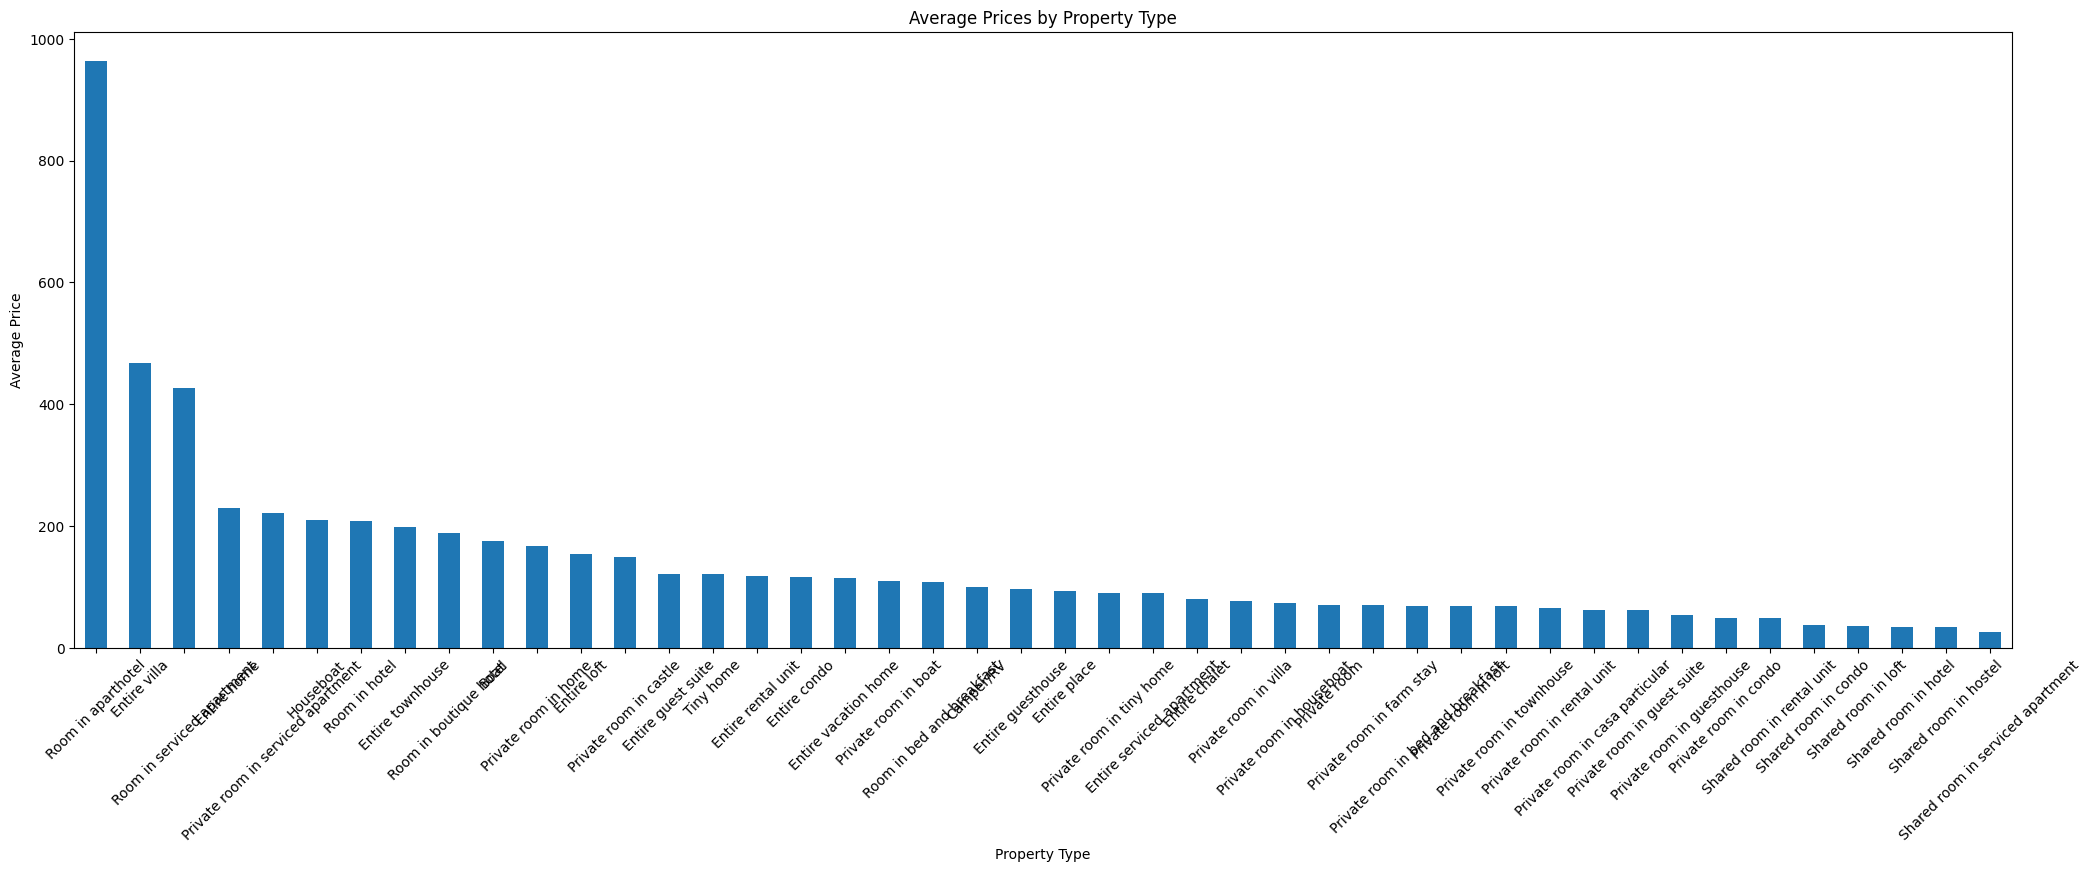

In [47]:
# Calculate the average prices by property type
average_prices = selectedData.groupby('property_type')['price'].mean().sort_values(ascending=False)

# Create a bar chart to visualize the average prices
plt.figure(figsize=(25, 8))
average_prices.plot(kind='bar')
plt.title('Average Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

To explore the relationship between listing prices and other categorical attributes, we can create boxplots to visualize the distribution of prices within each category of the attribute. For that, I'll use the *Seaborn* library for this purpose.

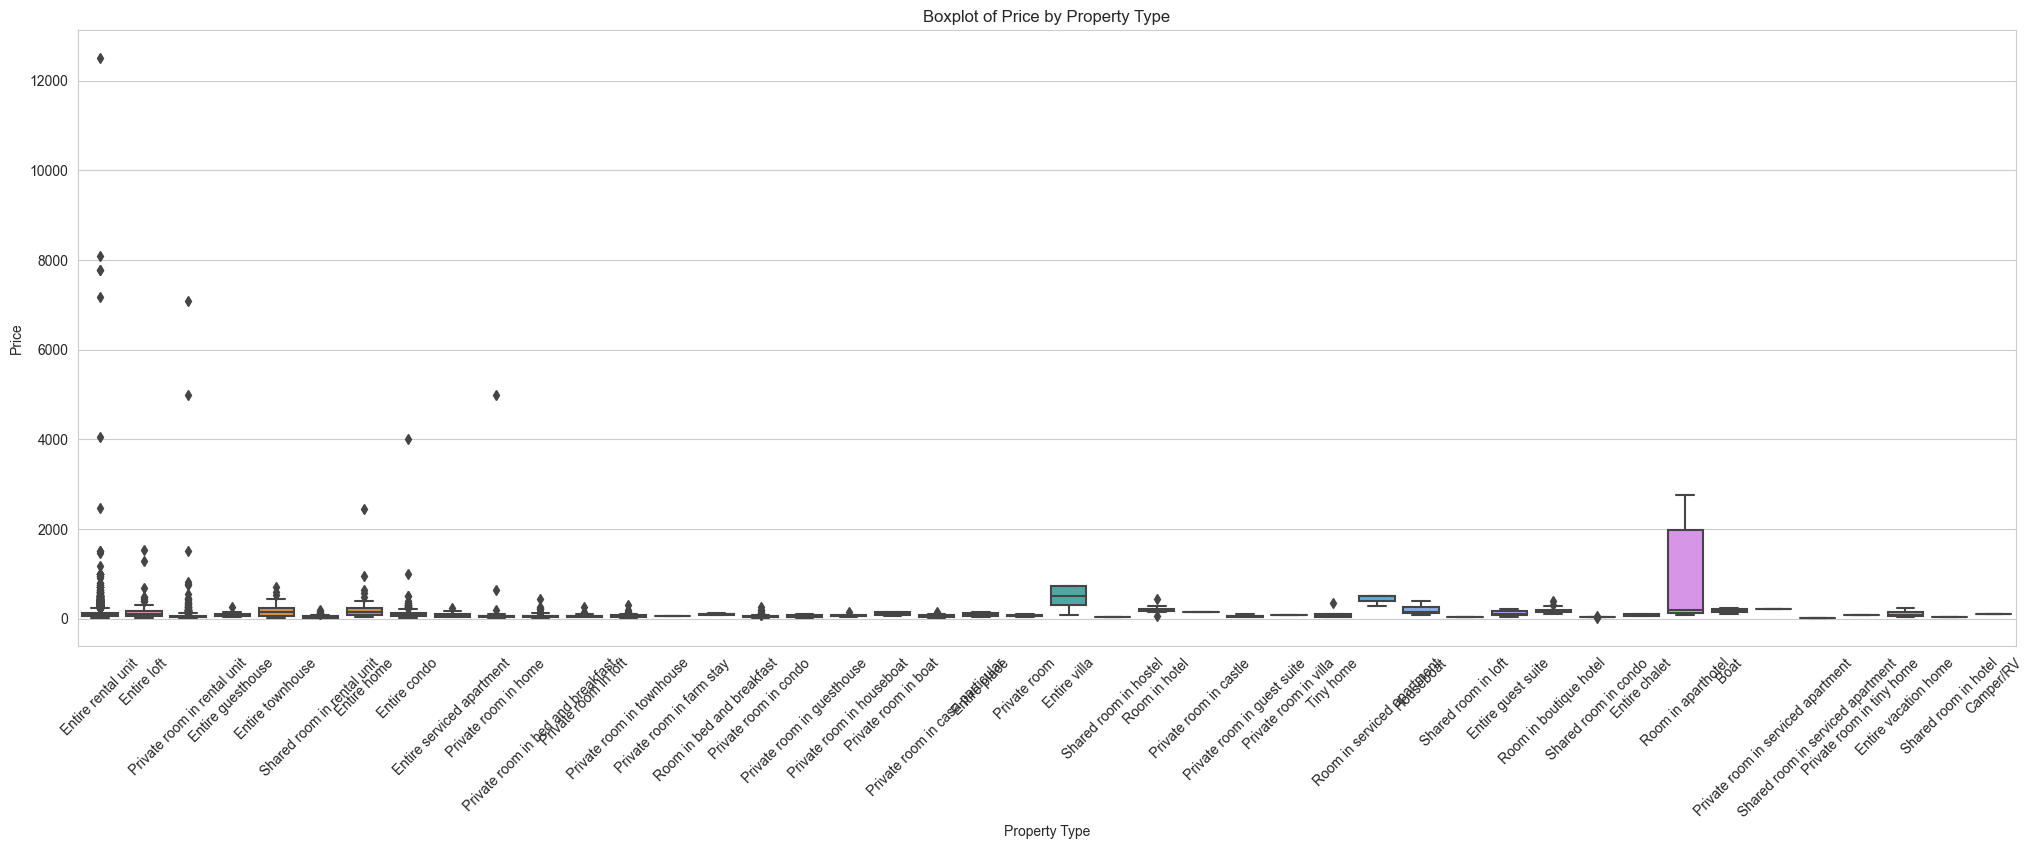

In [55]:
# Let's create a boxplot for 'property_type' vs. 'price'
plt.figure(figsize=(25,8))
sns.boxplot(x='property_type', y='price', data=selectedData)
plt.title('Boxplot of Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

As we want to practice descriptive statistical analysis, we'll explored the tendency of listing prices by calculating the mean prices for different property types and room types.

C:\Users\dafda\AppData\Local\Temp\ipykernel_17356\149647417.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price', y='property_type', data=selectedData, ci=None)


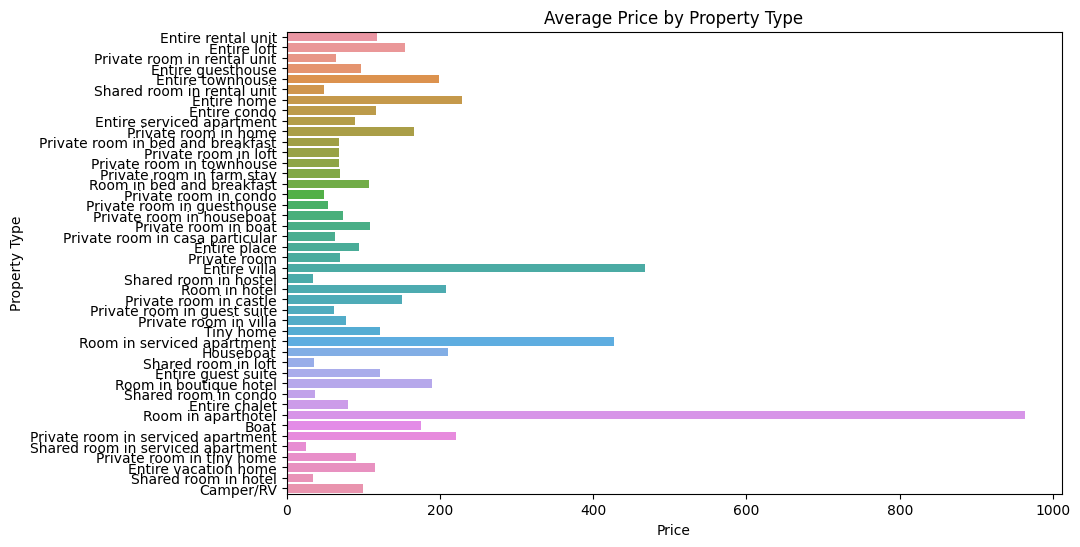

In [49]:
# Let's visualize this different.
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='property_type', data=selectedData, ci=None)
plt.title('Average Price by Property Type')
plt.xlabel('Price')
plt.ylabel('Property Type')
plt.show()

In [51]:
# Let's get know the most common property_type. First, we get the counts of each property type in selectedData:
propertyCounts = selectedData['property_type'].value_counts()

# Calculate the percentage of the four most common property types
topTypes = propertyCounts.head(4)
totalCount = len(selectedData)
percentages = (topTypes / totalCount) * 100

# Display the percentages
print("Percentage of the four most common property types in Lyon:")
print(percentages)

Percentage of the four most common property types in Lyon:
Entire rental unit             70.549606
Private room in rental unit    17.053950
Entire condo                    3.899778
Private room in condo           1.555870
Name: property_type, dtype: float64


### Room types:

C:\Users\dafda\AppData\Local\Temp\ipykernel_17356\3080268637.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price', y='room_type', data=selectedData, ci=None)


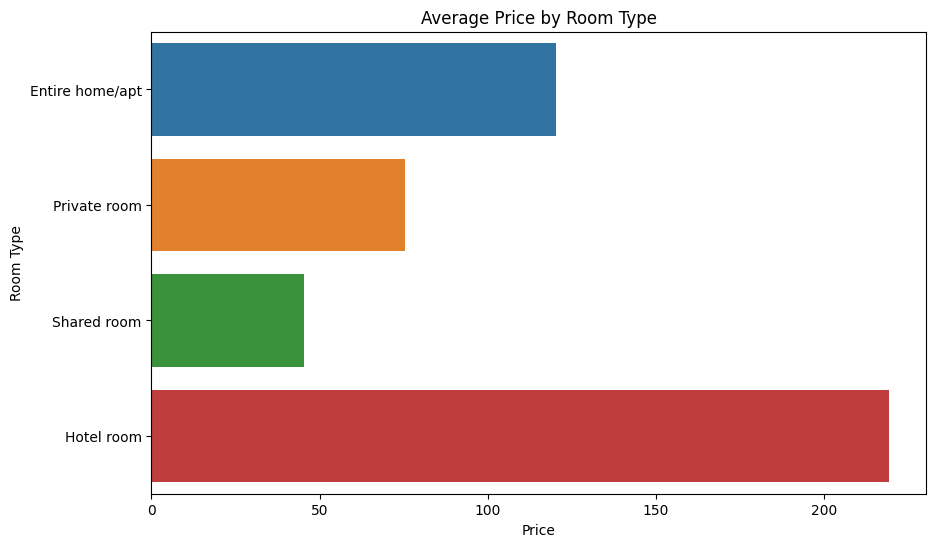

In [52]:
# Let's visualize this different.
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='room_type', data=selectedData, ci=None)
plt.title('Average Price by Room Type')
plt.xlabel('Price')
plt.ylabel('Room Type')
plt.show()

In [53]:
roomsCounts = selectedData['room_type'].value_counts()

# Calculate the percentage of the four most common property types
topRooms = roomsCounts.head(4)
percentages = (topRooms / totalCount) * 100

# Display the percentages
print("Percentage of the four most common room types in Lyon:")
print(percentages)

Percentage of the four most common room types in Lyon:
Entire home/apt    77.692463
Private room       21.519499
Shared room         0.676904
Hotel room          0.111134
Name: room_type, dtype: float64


## Other findings:

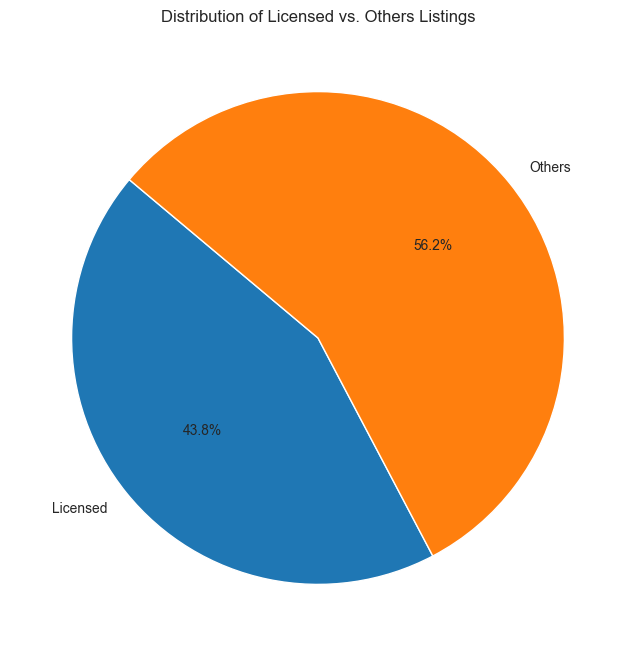

In [56]:
# Let's check if the "license" column contains numerical values:
selectedData['is_licensed'] = selectedData['license'].apply(lambda x: isinstance(x, (int, float)))

# We calculate the number of listings with a numerical license and without:
licensed_count = (selectedData['is_licensed'] == True).sum()
unlicensed_count = (selectedData['is_licensed'] == False).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")  # Optional: Set a background style
plt.pie([licensed_count, unlicensed_count], labels=["Licensed", "Others"], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Licensed vs. Others Listings')
plt.show()

In [58]:
# Calculate the average ratings and review counts
average_ratings = selectedData['review_scores_rating'].mean()
average_review_counts = selectedData['number_of_reviews'].mean()

# Print the results
print(f"Average Ratings: {average_ratings:.2f}")
print(f"Average Review Counts: {average_review_counts:.2f}")

Average Ratings: 4.63
Average Review Counts: 33.72


In [66]:
# We calculate the correlation between review scores and prices:
correlation = selectedData['review_scores_rating'].corr(selectedData['price'])

print(f"Correlation between Review Scores and Price: {correlation:.2f}")

Correlation between Review Scores and Price: 0.00


There is no significant correlation between ratings and prices.

# Summary and suggestions:

In this micro-project aimed at practicing *descriptive statistics*, I explored a dataset of Airbnb listings in Lyon, France, to gain insights into the pricing and availability patterns of accommodations. The objectives included:

- Explore the Relationship between Listing Price and Various Attributes: I started by examining the relationship between listing prices and property types. Notably, we observed that the most expensive property types, on average, were rooms in aparthotels, entire villas, and rooms in serviced apartments. This analysis also revealed that while these property types were among the most expensive, they were not the most common in the dataset.

- Identify the Most Common Property and Room Types: Further exploration uncovered that the most common room types were entire home/apartments, which represented 77.7% of the most common room types. In the case of property_type, it was the entire rental unit.

- Licensing Information: About 43.8% of the listings were marked as "licensed," while the status of the others was unspecified, requiring further investigation.

These findings address our question regarding how room or property type affects listing prices. Notably, we found that while some property types tend to be more expensive on average, they may not be the most prevalent. 

### Suggestions for Further Exploration

To enhance our understanding of Airbnb listing prices in Lyon, we recommend the following:

- Further Attribute Exploration: Expand the analysis to investigate the impact of other attributes, such as the number of bedrooms, bathrooms, or neighborhood, on listing prices.

- Machine Learning Modeling: Build predictive models to quantify the influence of different factors on pricing.

To keep practicing descriptive statistic:
- Calculate percentiles.
- Calculated correlations and covariances.
- Re-do better the box plots.